In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# exp_id = "reversed-"
# exp_id = "180401-train/"
exp_id = "180430-train/"
# exp_id = "180401/"
# exp_id = ""
results, saved = pickle.load(open('../output/streamer/scheduler/18Q2/' + exp_id + 'fairness_results.pkl'))

In [3]:
# print(saved)
table = []
for entry in saved:
    run_id = entry[0]
    run_id = run_id.split("-")[1:]
    scheduler = run_id[-2]
    budget = int(run_id[-1][1:])
    num_apps = entry[1]
#     entry[2] = [1 - x for x in entry[2]]
    row = [scheduler, num_apps, budget] + entry[2:6] + entry[-2:] 
#     print(row)
    table.append(row)
df = pd.DataFrame(table, columns=['scheduler', 'num_apps', 'budget', 'f1s', 'costs', 'objectives', 'configs', 'app_stats', 'total_cost'])    
#     print run_id, budge
#     saved = {}
#     for at, l in zip(att, lines):
#         print l
#         saved[l['num_apps']] = {
#             'sharing': l['sharing'],
#             'fps': l['fps'],
#         }

In [254]:
df

,scheduler,num_apps,budget,f1s,costs,objectives,configs,app_stats,total_cost
0,hifi_maxmin,4,100,"[0.536504111143, 0.141845921838, 0.55676022488...","[3.6252, 7.2708, 3.6252, 5.8452]","[0.463495888857, 0.858154078162, 0.44323977511...","[(69, 4), (51, 4), (69, 4), (57, 4)]","[[3.6252, 0.463495888857, 0.536504111143], [7....",99.9528
1,hifi_maxmin,8,100,"[0.179805998791, 0.141845921838, 0.35553890813...","[0.1308, 7.2708, 0.1308, 0.1308, 1.5921, 7.270...","[0.820194001209, 0.858154078162, 0.64446109186...","[(81, 4), (51, 4), (81, 4), (81, 4), (75, 3), ...","[[0.1308, 0.820194001209, 0.179805998791], [7....",99.8685
2,hifi_maxmin,12,100,"[0.352908212109, 0.128499273675, 0.36824499893...","[1.5921, 5.4531, 1.5921, 4.3839, 1.5921, 5.453...","[0.647091787891, 0.871500726325, 0.63175500106...","[(75, 3), (51, 3), (75, 3), (57, 3), (75, 3), ...","[[1.5921, 0.647091787891, 0.352908212109], [5....",99.3420
3,hifi_maxmin,16,100,"[0.352908212109, 0.128499273675, 0.25221203666...","[1.5921, 5.4531, 0.0981, 1.5921, 1.5921, 5.453...","[0.647091787891, 0.871500726325, 0.74778796333...","[(75, 3), (51, 3), (81, 3), (75, 3), (75, 3), ...","[[1.5921, 0.647091787891, 0.352908212109], [5....",99.8730
4,hifi_maxmin,4,125,"[0.705208236281, 0.149009542677, 0.71398887137...","[4.5315, 9.0885, 4.5315, 7.3065]","[0.294791763719, 0.850990457323, 0.28601112862...","[(69, 5), (51, 5), (69, 5), (57, 5)]","[[4.5315, 0.294791763719, 0.705208236281], [9....",124.9410
5,hifi_maxmin,8,125,"[0.53512881944, 0.149009542677, 0.438733533626...","[2.1228, 9.0885, 0.1635, 0.1635, 0.1635, 9.088...","[0.46487118056, 0.850990457323, 0.561266466374...","[(75, 4), (51, 5), (81, 5), (81, 5), (81, 5), ...","[[2.1228, 0.46487118056, 0.53512881944], [9.08...",124.9683
6,hifi_maxmin,12,125,"[0.53512881944, 0.141845921838, 0.541719158833...","[2.1228, 7.2708, 2.1228, 2.1228, 2.1228, 7.270...","[0.46487118056, 0.858154078162, 0.458280841167...","[(75, 4), (51, 4), (75, 4), (75, 4), (75, 4), ...","[[2.1228, 0.46487118056, 0.53512881944], [7.27...",123.5088
7,hifi_maxmin,16,125,"[0.53512881944, 0.141845921838, 0.355538908137...","[2.1228, 7.2708, 0.1308, 2.1228, 2.1228, 7.270...","[0.46487118056, 0.858154078162, 0.644461091863...","[(75, 4), (51, 4), (81, 4), (75, 4), (75, 4), ...","[[2.1228, 0.46487118056, 0.53512881944], [7.27...",123.6936
8,hifi_maxmin,4,150,"[0.792616122246, 0.149009542677, 0.77352221463...","[6.9786, 9.0885, 6.9786, 8.7678]","[0.207383877754, 0.850990457323, 0.22647778536...","[(63, 6), (51, 5), (63, 6), (57, 6)]","[[6.9786, 0.207383877754, 0.792616122246], [9....",149.6523
9,hifi_maxmin,8,150,"[0.703183883625, 0.149009542677, 0.71398887137...","[2.6535, 9.0885, 4.5315, 7.3065, 2.6535, 9.088...","[0.296816116375, 0.850990457323, 0.28601112862...","[(75, 5), (51, 5), (69, 5), (57, 5), (75, 5), ...","[[2.6535, 0.296816116375, 0.703183883625], [9....",148.5210


In [4]:
for x in ['f1', 'objective']:
    df[x+'_min'] = df[x+'s'].apply(min)
    df[x+'_max'] = df[x+'s'].apply(max)
    df[x+'_avg'] = df[x+'s'].apply(lambda xx: sum(xx)/len(xx))
    df[x+'_std'] = df[x+'s'].apply(np.std)

In [256]:
# df[['scheduler', 'num_apps', 'budget', 'f1_min', 'f1_avg', 'f1_std', 'f1_max', 'f1s', 'configs']].index(df['budget'] == 75)

In [257]:
df[['scheduler', 'num_apps', 'budget', 'f1_min', 'f1_avg', 'f1_std', 'f1_max', 'f1s', 'objective_min', 'objective_avg', 'objective_std', 'objective_max']]

,scheduler,num_apps,budget,f1_min,f1_avg,f1_std,f1_max,f1s,objective_min,objective_avg,objective_std,objective_max
0,hifi_maxmin,4,100,0.141846,0.474554,0.198017,0.663107,"[0.536504111143, 0.141845921838, 0.55676022488...",0.336893,0.525446,0.198017,0.858154
1,hifi_maxmin,8,100,0.141846,0.277932,0.096275,0.355539,"[0.179805998791, 0.141845921838, 0.35553890813...",0.644461,0.722068,0.096275,0.858154
2,hifi_maxmin,12,100,0.128499,0.321977,0.115494,0.437494,"[0.352908212109, 0.128499273675, 0.36824499893...",0.562506,0.678023,0.115494,0.871501
3,hifi_maxmin,16,100,0.128499,0.296655,0.112018,0.421738,"[0.352908212109, 0.128499273675, 0.25221203666...",0.578262,0.703345,0.112018,0.871501
4,hifi_maxmin,4,125,0.149010,0.609804,0.274097,0.871011,"[0.705208236281, 0.149009542677, 0.71398887137...",0.128989,0.390196,0.274097,0.850990
5,hifi_maxmin,8,125,0.149010,0.365144,0.148008,0.535129,"[0.53512881944, 0.149009542677, 0.438733533626...",0.464871,0.634856,0.148008,0.850990
6,hifi_maxmin,12,125,0.141846,0.466401,0.191938,0.641896,"[0.53512881944, 0.141845921838, 0.541719158833...",0.358104,0.533599,0.191938,0.858154
7,hifi_maxmin,16,125,0.141846,0.363495,0.156690,0.641896,"[0.53512881944, 0.141845921838, 0.355538908137...",0.358104,0.636505,0.156690,0.858154
8,hifi_maxmin,4,150,0.149010,0.669893,0.309786,0.964425,"[0.792616122246, 0.149009542677, 0.77352221463...",0.035575,0.330107,0.309786,0.850990
9,hifi_maxmin,8,150,0.149010,0.609298,0.273922,0.871011,"[0.703183883625, 0.149009542677, 0.71398887137...",0.128989,0.390702,0.273922,0.850990


In [258]:
df[['scheduler', 'num_apps', 'budget', 'f1_min', 'f1_avg', 'f1_std', 'f1_max', 'f1s', 'app_stats']]

,scheduler,num_apps,budget,f1_min,f1_avg,f1_std,f1_max,f1s,app_stats
0,hifi_maxmin,4,100,0.141846,0.474554,0.198017,0.663107,"[0.536504111143, 0.141845921838, 0.55676022488...","[[3.6252, 0.463495888857, 0.536504111143], [7...."
1,hifi_maxmin,8,100,0.141846,0.277932,0.096275,0.355539,"[0.179805998791, 0.141845921838, 0.35553890813...","[[0.1308, 0.820194001209, 0.179805998791], [7...."
2,hifi_maxmin,12,100,0.128499,0.321977,0.115494,0.437494,"[0.352908212109, 0.128499273675, 0.36824499893...","[[1.5921, 0.647091787891, 0.352908212109], [5...."
3,hifi_maxmin,16,100,0.128499,0.296655,0.112018,0.421738,"[0.352908212109, 0.128499273675, 0.25221203666...","[[1.5921, 0.647091787891, 0.352908212109], [5...."
4,hifi_maxmin,4,125,0.149010,0.609804,0.274097,0.871011,"[0.705208236281, 0.149009542677, 0.71398887137...","[[4.5315, 0.294791763719, 0.705208236281], [9...."
5,hifi_maxmin,8,125,0.149010,0.365144,0.148008,0.535129,"[0.53512881944, 0.149009542677, 0.438733533626...","[[2.1228, 0.46487118056, 0.53512881944], [9.08..."
6,hifi_maxmin,12,125,0.141846,0.466401,0.191938,0.641896,"[0.53512881944, 0.141845921838, 0.541719158833...","[[2.1228, 0.46487118056, 0.53512881944], [7.27..."
7,hifi_maxmin,16,125,0.141846,0.363495,0.156690,0.641896,"[0.53512881944, 0.141845921838, 0.355538908137...","[[2.1228, 0.46487118056, 0.53512881944], [7.27..."
8,hifi_maxmin,4,150,0.149010,0.669893,0.309786,0.964425,"[0.792616122246, 0.149009542677, 0.77352221463...","[[6.9786, 0.207383877754, 0.792616122246], [9...."
9,hifi_maxmin,8,150,0.149010,0.609298,0.273922,0.871011,"[0.703183883625, 0.149009542677, 0.71398887137...","[[2.6535, 0.296816116375, 0.703183883625], [9...."


In [11]:
dff = df
dff[(dff['budget'] == 75) & (dff['num_apps'] == 8)]

,scheduler,num_apps,budget,f1s,costs,objectives,configs,app_stats,total_cost,f1_min,f1_max,f1_avg,f1_std,objective_min,objective_max,objective_avg,objective_std
29,hifi_maxmin,8,75,"[0.178877312303, 0.128499273675, 0.25221203666...","[1.0614, 5.4531, 0.0981, 0.0981, 0.0981, 5.453...","[0.821122687697, 0.871500726325, 0.74778796333...","[(75, 2), (51, 3), (81, 3), (81, 3), (81, 3), ...","[[1.0614, 0.821122687697, 0.178877312303], [5....",74.7687,0.114160,0.252212,0.186074,0.053060,0.747788,0.885840,0.813926,0.053060
61,hifi_avg,8,75,"[0.352908212109, 0.105993358363, 0.37726867442...","[1.5921, 1.5921, 2.7189, 1.5921, 1.5921, 1.592...","[0.647091787891, 0.894006641637, 0.62273132557...","[(75, 3), (75, 3), (69, 3), (75, 3), (75, 3), ...","[[1.5921, 0.647091787891, 0.352908212109], [1....",74.6802,0.105993,0.421738,0.313349,0.122331,0.578262,0.894007,0.686651,0.122331
88,stems_maxmin,8,75,"[0.114159823753, 0.128499273675, 0.13779487551...","[0.0981, 5.4531, 0.0654, 0.0981, 1.0614, 5.453...","[0.885840176247, 0.871500726325, 0.86220512448...","[(81, 3), (51, 3), (81, 2), (81, 3), (75, 2), ...","[[0.0981, 0.885840176247, 0.114159823753], [5....",74.7360,0.114160,0.252212,0.171772,0.048532,0.747788,0.885840,0.828228,0.048532
115,stems_avg,8,75,"[0.352908212109, 0.0866055004779, 0.3682449989...","[1.5921, 1.0614, 1.5921, 1.5921, 1.5921, 1.592...","[0.647091787891, 0.913394499522, 0.63175500106...","[(75, 3), (75, 2), (75, 3), (75, 3), (75, 3), ...","[[1.5921, 0.647091787891, 0.352908212109], [1....",74.1495,0.086606,0.421738,0.310926,0.126534,0.578262,0.913394,0.689074,0.126534
147,greedy,8,75,"[0.352908212109, 0.106685073636, 0.36824499893...","[1.5921, 2.7189, 1.5921, 1.5921, 1.5921, 1.592...","[0.647091787891, 0.893314926364, 0.63175500106...","[(75, 3), (69, 3), (75, 3), (75, 3), (75, 3), ...","[[1.5921, 0.647091787891, 0.352908212109], [2....",74.6802,0.105993,0.421738,0.312307,0.121630,0.578262,0.894007,0.687693,0.121630


In [259]:
pairs = [
    ('hifi_avg', 'greedy'),
#     ('stems_avg', 'greedy'),
    ('hifi_avg', 'hifi_maxmin'),
#     ('stems_avg', 'stems_maxmin'),
#     ('avg', 'greedy'),
#     ('avg', 'maxmin')
]
for lesser, greater in pairs:
    for a, b in df.groupby('num_apps'):
        dd = b.pivot(index='budget', columns='scheduler', values='f1_avg')
        offenders = dd.index[dd[lesser] < dd[greater]].tolist()
        gg = df[(df['num_apps'] == a) & (df['budget'].isin(offenders)) & (df['scheduler'].isin(['greedy', 'avg']))][['scheduler', 'budget', 'f1_avg', 'total_cost', 'configs', 'f1s']]
        if len(offenders) != 0:
            print 'Bad:', a, lesser, greater
            print dd[dd[lesser] < dd[greater]]
            print gg.sort_values('budget')
#         assert len(offenders) == 0, (lesser, greater)

# print 

pairs = [
    ('hifi_maxmin', 'hifi_avg'),
    ('hifi_maxmin', 'greedy'),
    ('stems_maxmin', 'stems_avg'),
#     ('maxmin', 'avg'),
]
for lesser, greater in pairs:
    for a, b in df.groupby('num_apps'):
        dd = b.pivot(index='budget', columns='scheduler', values='f1_min')
        offenders = dd[dd[greater] > dd[lesser]]
        if len(offenders) > 0:
            print 'Bad:', a, greater, lesser
            print offenders
        assert len(offenders) == 0

In [260]:
dff = df[['scheduler', 'num_apps', 'budget', 'f1_min', 'f1_avg', 'f1_std', 'f1_max']]

In [261]:
# dff

In [262]:
# # legend/lines: type
# # y: f1_min/f1_mean/f1_std
# # x: budget, fix num_apps
# from matplotlib import colors
# import sys
# sys.path.append('../scripts/util')
# from plot_util import COLORLISTS
# params = dict() #lw=3, ms=8, alpha=0.7, linestyle='--')
# colorlist = COLORLISTS[8]
# for a, b in dff.groupby('num_apps'):
#     ax = None
#     fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
#     for i, (c, d) in enumerate(b.groupby('scheduler')):
#         d = d.sort_values('budget', ascending=False)
# #         print(d)
#         d.plot(y='f1_min', x='budget', kind='scatter',ax=ax1, color=colorlist[i*2], label=c, marker='*', **params)
#         d.plot(y='f1_avg', x='budget', kind='scatter',ax=ax2, color=colorlist[i*2+1], label=c, marker='+', **params)   
#     ax1.legend(loc=3)
#     plt.title('Num apps: '+str(a))
#     ax2.legend(loc=1)
#     fig.savefig("../plots/scheduler/fairness/{}maxmin_numapps-{}-d.pdf".format(exp_id, a))

In [263]:
from matplotlib import colors
import sys
sys.path.append('../scripts/util')
from plot_util import COLORLISTS
from plot_util import COLORS
colorlist = [COLORS['blue'], COLORS['green'], COLORS['pink'], colors.colorConverter.to_rgb("#005500"), COLORS['red']]
cap = [10, 6, 3, 8, 4]

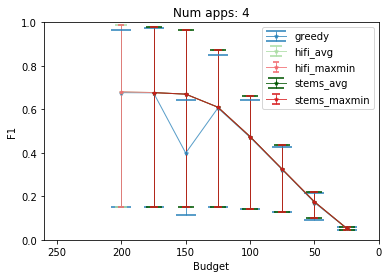

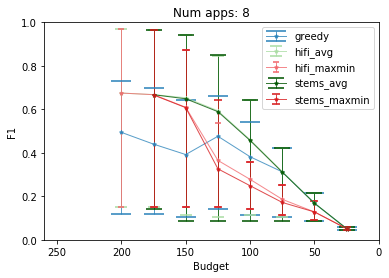

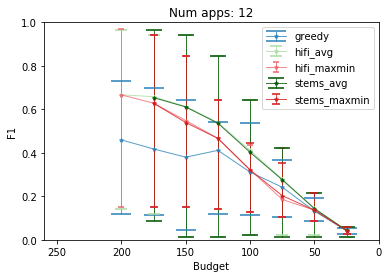

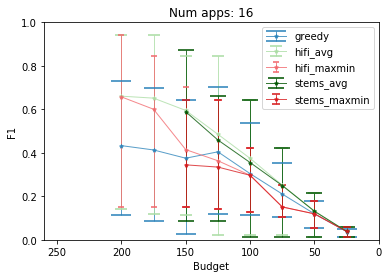

In [264]:
# legend/lines: type
# y: f1_min/f1_mean/f1_std
# x: budget, fix num_apps

params = dict(lw=1, ms=4, alpha=0.78, capthick=2) # linestyle='--') capsize=5, 
for a, b in dff.groupby('num_apps'):
    ax = None
    fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
    
    for i, (c, d) in enumerate(b.groupby('scheduler')):
        d = d.sort_values('budget')
        errs = [np.array(d['f1_avg'] - d['f1_min']), np.array(d['f1_max'] - d['f1_avg'])]
#         errs = [errs[0], np.zeros(errs[0].shape)]
        ax1.errorbar(d['budget'], d['f1_avg'], yerr=errs, color=colorlist[i], label=c, marker='*', capsize=cap[i], **params)
#         d.plot(y='f1_min', x='budget', kind='scatter',ax=ax1, color=colorlist[i*2], label=c, marker='*', **params)
#         d.plot(y='f1_avg', x='budget', kind='scatter',ax=ax2, color=colorlist[i*2+1], label=c, marker='+', **params)   
    ax1.legend()
#     ax2.legend(loc=1)
    plt.title('Num apps: '+str(a))
    plt.ylim(0, 1)
    plt.ylabel('F1')
    plt.xlim(260, 0)
    plt.xlabel('Budget')
    fig.savefig("../plots/scheduler/fairness/{}maxmin_numapps-{}.pdf".format(exp_id, a))
    fig.savefig("../plots/scheduler/fairness/{}maxmin_numapps-{}.png".format(exp_id, a), dpi=600)

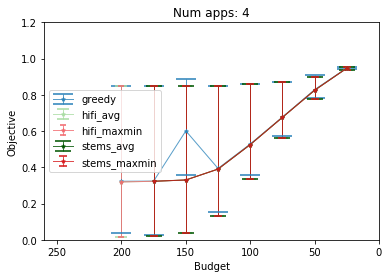

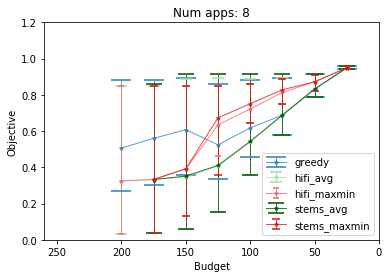

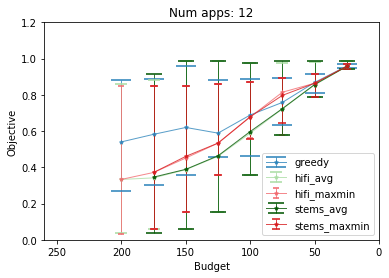

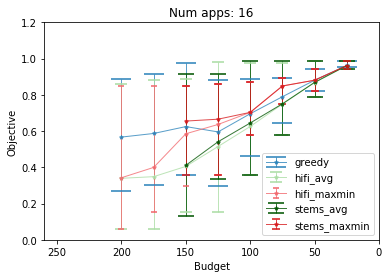

In [265]:
dff_ = df[['scheduler', 'num_apps', 'budget', 'objective_min', 'objective_avg', 'objective_std', 'objective_max']]
# legend/lines: type
# y: f1_min/f1_mean/f1_std
# x: budget, fix num_apps
params = dict(lw=1, ms=4, alpha=0.78, capthick=2) # linestyle='--') capsize=5, 
for a, b in dff_.groupby('num_apps'):
    ax = None
    fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
    
    for i, (c, d) in enumerate(b.groupby('scheduler')):
        d = d.sort_values('budget')
        errs = [np.array(d['objective_avg'] - d['objective_min']), np.array(d['objective_max'] - d['objective_avg'])]
#         errs = [errs[0], np.zeros(errs[0].shape)]
        ax1.errorbar(d['budget'], d['objective_avg'], yerr=errs, color=colorlist[i], label=c, marker='*', capsize=cap[i], **params)
#         d.plot(y='f1_min', x='budget', kind='scatter',ax=ax1, color=colorlist[i*2], label=c, marker='*', **params)
#         d.plot(y='f1_avg', x='budget', kind='scatter',ax=ax2, color=colorlist[i*2+1], label=c, marker='+', **params)   
    ax1.legend()
#     ax2.legend(loc=1)
    plt.title('Num apps: '+str(a))
    plt.ylim(0, 1.2)
    plt.ylabel('Objective')
    plt.xlim(260, 0)
    plt.xlabel('Budget')
    fig.savefig("../plots/scheduler/fairness/{}maxmin_numapps-{}-obj.pdf".format(exp_id, a))
    fig.savefig("../plots/scheduler/fairness/{}maxmin_numapps-{}-obj.png".format(exp_id, a), dpi=600)